In [2]:
# Load Data and Model
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

# Load target variables properly
y_train_df = pd.read_csv('../data/processed/y_train.csv')
y_test_df = pd.read_csv('../data/processed/y_test.csv', index_col=0)

# Extract the loan_status column and convert to 1D numpy array
y_train = y_train_df['loan_status'].values
y_test = y_test_df['loan_status'].values

# Convert boolean columns to int
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Load the saved model
model = joblib.load('../models/best_model.pkl')

print("=== Data Loading Complete ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Model type: {type(model).__name__}")
print(f"Boolean columns converted: {list(bool_cols)}")
print(f"X_test and y_test shapes match: {X_test.shape[0] == y_test.shape[0]}")
print(f"Unique y_test values: {np.unique(y_test)}")
print("✓ All data loaded successfully!")

NameError: name 'pd' is not defined

In [20]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("=== Prediction Results ===")
print(f"Predictions shape: {y_pred.shape}")
print(f"Probabilities shape: {y_pred_proba.shape}")
print(f"Unique predictions: {np.unique(y_pred)}")
print(f"Prediction counts: {np.bincount(y_pred)}")
print(f"Probability range: [{y_pred_proba.min():.3f}, {y_pred_proba.max():.3f}]")
print(f"Mean probability: {y_pred_proba.mean():.3f}")
print(f"Predicted defaults: {np.sum(y_pred == 1)} ({np.mean(y_pred == 1):.1%})")
print(f"Predicted non-defaults: {np.sum(y_pred == 0)} ({np.mean(y_pred == 0):.1%})")
print("✓ Predictions generated successfully!")

=== Prediction Results ===
Predictions shape: (4906,)
Probabilities shape: (4906,)
Unique predictions: [0 1]
Prediction counts: [4017  889]
Probability range: [0.000, 1.000]
Mean probability: 0.241
Predicted defaults: 889 (18.1%)
Predicted non-defaults: 4017 (81.9%)
✓ Predictions generated successfully!


In [22]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n=== Confusion Matrix ===")
print(cm)

# Detailed confusion matrix interpretation
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {tp/(tp+fp):.4f}")
print(f"Recall: {tp/(tp+fn):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print("✓ Classification metrics calculated!")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3781
           1       0.96      0.76      0.85      1125

    accuracy                           0.94      4906
   macro avg       0.94      0.87      0.90      4906
weighted avg       0.94      0.94      0.93      4906

ROC AUC: 0.9452
Accuracy: 0.9364

=== Confusion Matrix ===
[[3743   38]
 [ 274  851]]

True Negatives: 3743
False Positives: 38
False Negatives: 274
True Positives: 851
Precision: 0.9573
Recall: 0.7564
Specificity: 0.9899
✓ Classification metrics calculated!


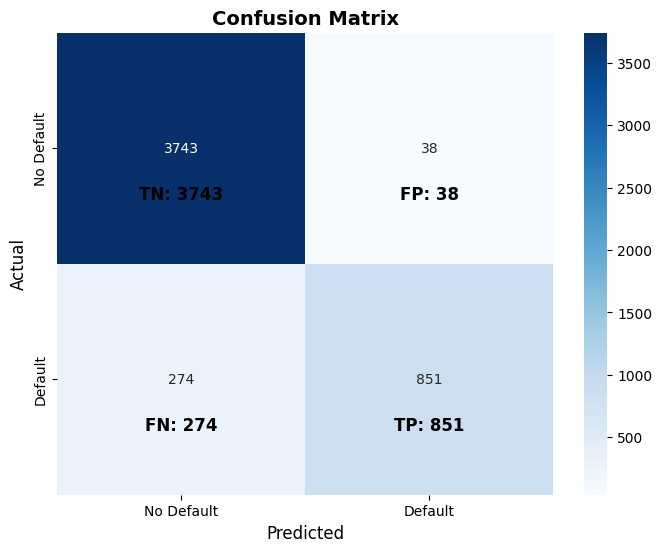

=== Confusion Matrix Analysis ===
True Negatives (TN): 3,743 - Correctly predicted no default
False Positives (FP): 38 - Incorrectly predicted default
False Negatives (FN): 274 - Missed default predictions
True Positives (TP): 851 - Correctly predicted default

Accuracy: 0.9364
Precision: 0.9573
Recall: 0.7564
Specificity: 0.9899
✓ Confusion matrix visualized!


In [23]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Add text annotations for each quadrant
tn, fp, fn, tp = cm.ravel()
plt.text(0.5, 0.7, f'TN: {tn}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1.5, 0.7, f'FP: {fp}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(0.5, 1.7, f'FN: {fn}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1.5, 1.7, f'TP: {tp}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()

print("=== Confusion Matrix Analysis ===")
print(f"True Negatives (TN): {tn:,} - Correctly predicted no default")
print(f"False Positives (FP): {fp:,} - Incorrectly predicted default")
print(f"False Negatives (FN): {fn:,} - Missed default predictions")
print(f"True Positives (TP): {tp:,} - Correctly predicted default")
print(f"\nAccuracy: {(tp+tn)/(tp+tn+fp+fn):.4f}")
print(f"Precision: {tp/(tp+fp):.4f}")
print(f"Recall: {tp/(tp+fn):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print("✓ Confusion matrix visualized!")

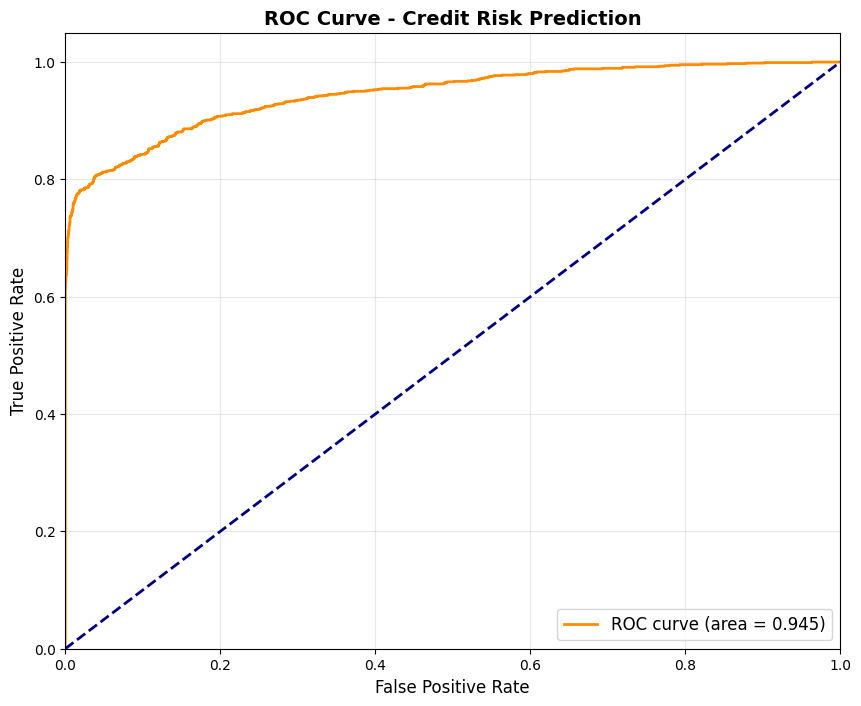

✓ ROC curve plotted!


In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Credit Risk Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
print("✓ ROC curve plotted!")

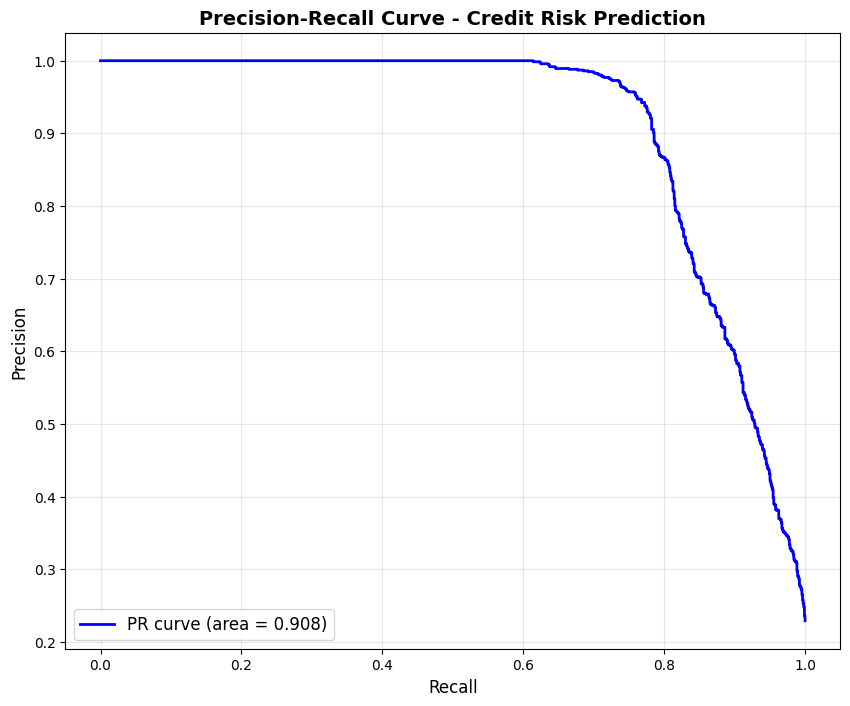

✓ PR curve plotted!


In [25]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Credit Risk Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
print("✓ PR curve plotted!")

=== Probability Distribution Analysis ===
Overall probability statistics:
  Mean: 0.241
  Std: 0.317
  Min: 0.000
  Max: 1.000
  Median: 0.091

Probability by actual class:
  Non-default mean: 0.098
  Default mean: 0.722
  Non-default count: 3781
  Default count: 1125


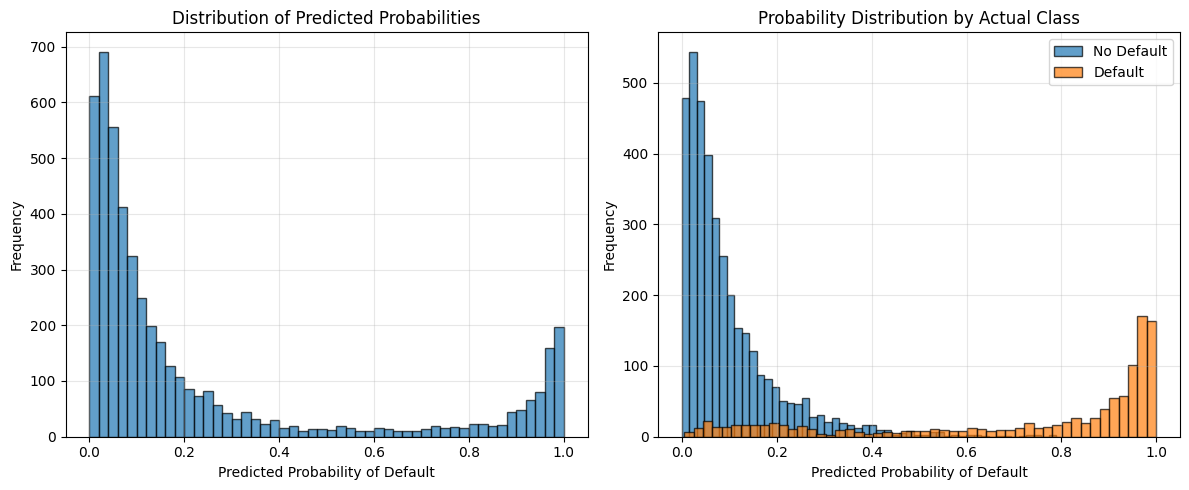

✓ Probability distributions plotted!


In [26]:
# Probability Distribution Analysis
print("=== Probability Distribution Analysis ===")
print(f"Overall probability statistics:")
print(f"  Mean: {y_pred_proba.mean():.3f}")
print(f"  Std: {y_pred_proba.std():.3f}")
print(f"  Min: {y_pred_proba.min():.3f}")
print(f"  Max: {y_pred_proba.max():.3f}")
print(f"  Median: {np.median(y_pred_proba):.3f}")

print(f"\nProbability by actual class:")
print(f"  Non-default mean: {y_pred_proba[y_test == 0].mean():.3f}")
print(f"  Default mean: {y_pred_proba[y_test == 1].mean():.3f}")
print(f"  Non-default count: {np.sum(y_test == 0)}")
print(f"  Default count: {np.sum(y_test == 1)}")

plt.figure(figsize=(12, 5))

# Distribution of predicted probabilities
plt.subplot(1, 2, 1)
plt.hist(y_pred_proba, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid(True, alpha=0.3)

# Probability distribution by actual class
plt.subplot(1, 2, 2)
plt.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, label='No Default', edgecolor='black')
plt.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.7, label='Default', edgecolor='black')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Actual Class')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Probability distributions plotted!")

=== Threshold Analysis ===
Performance at different thresholds:
  0.10: Precision=0.459, Recall=0.942, F1=0.617
  0.15: Precision=0.575, Recall=0.908, F1=0.704
  0.20: Precision=0.667, Recall=0.866, F1=0.754
  0.25: Precision=0.744, Recall=0.833, F1=0.786
  0.30: Precision=0.819, Recall=0.814, F1=0.816
  0.35: Precision=0.870, Recall=0.796, F1=0.831
  0.40: Precision=0.916, Recall=0.782, F1=0.844
  0.45: Precision=0.942, Recall=0.772, F1=0.848
  0.50: Precision=0.957, Recall=0.756, F1=0.845
  0.55: Precision=0.973, Recall=0.733, F1=0.836
  0.60: Precision=0.978, Recall=0.715, F1=0.826
  0.65: Precision=0.986, Recall=0.692, F1=0.813
  0.70: Precision=0.988, Recall=0.670, F1=0.799
  0.75: Precision=0.992, Recall=0.637, F1=0.776
  0.80: Precision=1.000, Recall=0.604, F1=0.753
  0.85: Precision=1.000, Recall=0.553, F1=0.712

Optimal threshold (max F1): 0.45
F1 Score at optimal threshold: 0.848
Precision at optimal threshold: 0.942
Recall at optimal threshold: 0.772


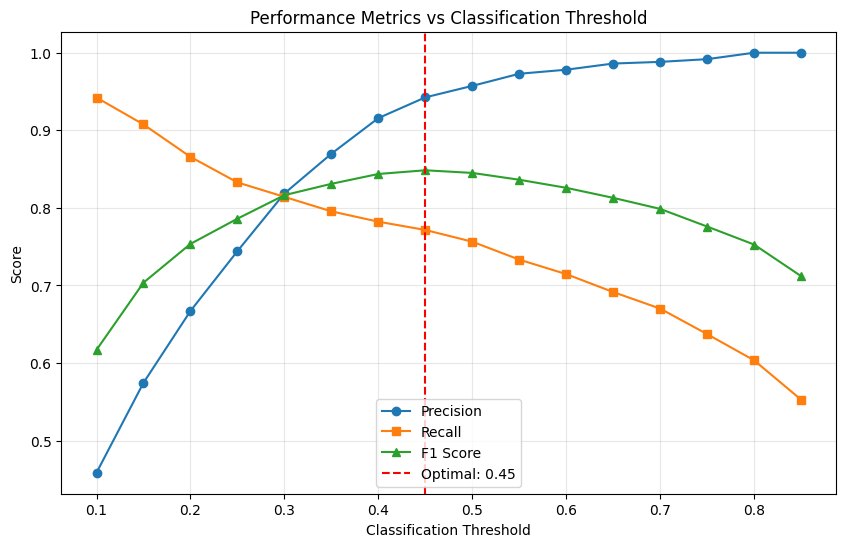

✓ Threshold analysis complete!


In [27]:
# Threshold Analysis
print("=== Threshold Analysis ===")
thresholds = np.arange(0.1, 0.9, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    from sklearn.metrics import precision_score, recall_score, f1_score
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

print("Performance at different thresholds:")
for i, thresh in enumerate(thresholds):
    print(f"  {thresh:.2f}: Precision={precision_scores[i]:.3f}, Recall={recall_scores[i]:.3f}, F1={f1_scores[i]:.3f}")

# Find optimal threshold (max F1)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal threshold (max F1): {optimal_threshold:.2f}")
print(f"F1 Score at optimal threshold: {f1_scores[optimal_idx]:.3f}")
print(f"Precision at optimal threshold: {precision_scores[optimal_idx]:.3f}")
print(f"Recall at optimal threshold: {recall_scores[optimal_idx]:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, marker='o', label='Precision')
plt.plot(thresholds, recall_scores, marker='s', label='Recall')
plt.plot(thresholds, f1_scores, marker='^', label='F1 Score')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal: {optimal_threshold:.2f}')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs Classification Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print("✓ Threshold analysis complete!")

In [28]:
# Final Model Summary
from sklearn.metrics import precision_score, recall_score, f1_score

print("=" * 60)
print("FINAL MODEL EVALUATION SUMMARY")
print("=" * 60)
print(f"Model Type: {type(model).__name__}")
print(f"Test Samples: {len(y_test):,}")
print(f"Training Samples: {len(y_train):,}")
print(f"Features: {X_train.shape[1]}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.2f}")

print(f"\nPerformance at 0.5 Threshold:")
print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred):.4f}")

print(f"\nPerformance at Optimal Threshold ({optimal_threshold:.2f}):")
y_pred_opt = (y_pred_proba >= optimal_threshold).astype(int)
print(f"  Precision: {precision_score(y_test, y_pred_opt):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_opt):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_opt):.4f}")

print(f"\nConfusion Matrix (0.5 Threshold):")
print(f"  True Negatives: {tn:,}")
print(f"  False Positives: {fp:,}")
print(f"  False Negatives: {fn:,}")
print(f"  True Positives: {tp:,}")

print(f"\nBusiness Impact:")
print(f"  Default Detection Rate: {tp/(tp+fn):.1%}")
print(f"  False Alarm Rate: {fp/(fp+tn):.1%}")
print(f"  Overall Accuracy: {(tp+tn)/(tp+tn+fp+fn):.1%}")
print(f"  Cost of False Negatives: {fn} missed defaults")
print(f"  Cost of False Positives: {fp} incorrect default predictions")

print(f"\nData Quality:")
print(f"  Class Balance - Training: {np.mean(y_train):.1%} defaults")
print(f"  Class Balance - Test: {np.mean(y_test):.1%} defaults")
print(f"  Prediction Balance: {np.mean(y_pred):.1%} predicted defaults")

print("=" * 60)
print("✓ Model evaluation complete!")
print("=" * 60)

FINAL MODEL EVALUATION SUMMARY
Model Type: RandomForestClassifier
Test Samples: 4,906
Training Samples: 19,624
Features: 29
ROC AUC: 0.9452
PR AUC: 0.9079
Accuracy: 0.9364
Optimal Threshold: 0.45

Performance at 0.5 Threshold:
  Precision: 0.9573
  Recall: 0.7564
  F1 Score: 0.8451

Performance at Optimal Threshold (0.45):
  Precision: 0.9425
  Recall: 0.7716
  F1 Score: 0.8485

Confusion Matrix (0.5 Threshold):
  True Negatives: 3,743
  False Positives: 38
  False Negatives: 274
  True Positives: 851

Business Impact:
  Default Detection Rate: 75.6%
  False Alarm Rate: 1.0%
  Overall Accuracy: 93.6%
  Cost of False Negatives: 274 missed defaults
  Cost of False Positives: 38 incorrect default predictions

Data Quality:
  Class Balance - Training: 22.9% defaults
  Class Balance - Test: 22.9% defaults
  Prediction Balance: 18.1% predicted defaults
✓ Model evaluation complete!
